# Credit Card Fraud Detection - Complete ML Pipeline

## Project Overview
- **Goal**: Detect fraudulent credit card transactions
- **Dataset**: 284,807 transactions with 30 features + 1 target
- **Challenge**: Highly imbalanced data (99.83% normal vs 0.17% fraud)
- **Approach**: Complete ML pipeline with proper validation and evaluation

## Pipeline Steps:
1. **Data Collection & Loading**
2. **Exploratory Data Analysis (EDA)**
3. **Data Preprocessing & Feature Engineering**
4. **Handle Imbalanced Data**
5. **Train/Validation/Test Split**
6. **Model Training & Comparison**
7. **Model Evaluation & Validation**
8. **Hyperparameter Tuning**
9. **Final Model Selection**
10. **Performance Analysis & Conclusions**


## 1. Data Collection & Initial Setup


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_auc_score, roc_curve, precision_recall_curve,
                           accuracy_score, precision_score, recall_score, f1_score)

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("📊 Ready for Credit Card Fraud Detection Analysis")


✅ All libraries imported successfully!
📊 Ready for Credit Card Fraud Detection Analysis


In [2]:
# Load the dataset
print("📂 Loading Credit Card Dataset...")
data = pd.read_csv('creditcard.csv')

print(f"✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {data.shape}")
print(f"🔍 Features: {data.shape[1] - 1} + 1 target variable")
print(f"📝 Total transactions: {data.shape[0]:,}")

# Basic info
print("\n" + "="*50)
print("DATASET BASIC INFORMATION")
print("="*50)
print(data.info())


📂 Loading Credit Card Dataset...
✅ Dataset loaded successfully!
📊 Dataset shape: (284807, 31)
🔍 Features: 30 + 1 target variable
📝 Total transactions: 284,807

DATASET BASIC INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807

## 2. Exploratory Data Analysis (EDA)


In [3]:
# First look at the data
print("="*60)
print("FIRST 5 ROWS OF DATASET")
print("="*60)
print(data.head())

print("\n" + "="*60)
print("DATASET STATISTICAL SUMMARY")
print("="*60)
print(data.describe())

print("\n" + "="*60)
print("MISSING VALUES CHECK")
print("="*60)
missing_values = data.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("✅ No missing values found!")


FIRST 5 ROWS OF DATASET
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        

TARGET VARIABLE ANALYSIS
Class Distribution:
Normal transactions (Class 0): 284,315 (99.83%)
Fraud transactions (Class 1):  492 (0.17%)

🚨 Imbalance Ratio: 577.9:1
📊 This is HIGHLY IMBALANCED data!


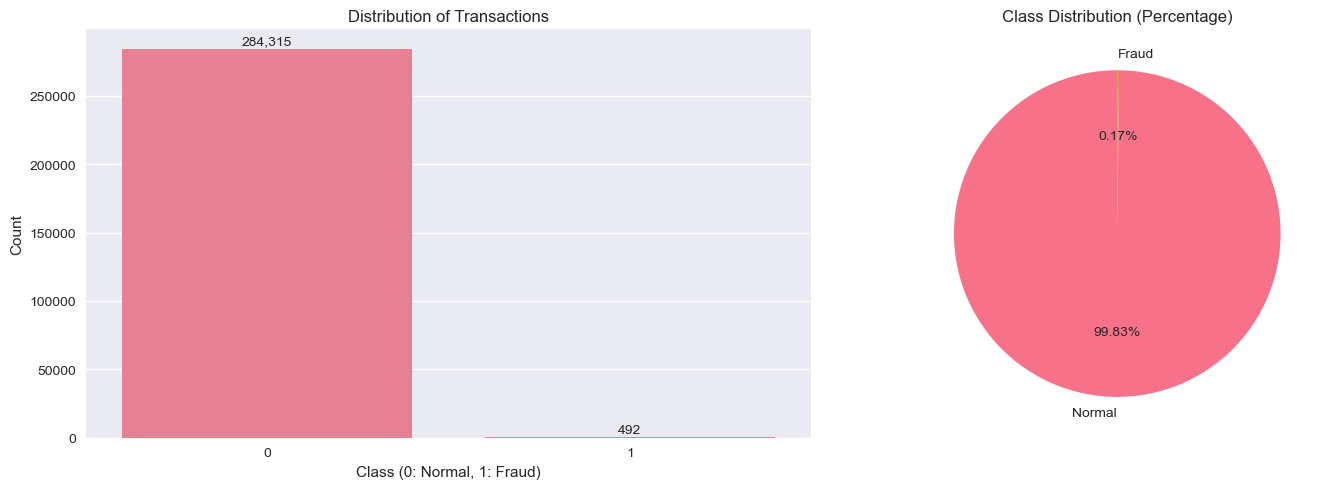


⚠️  CRITICAL INSIGHT:
   - Only 0.173% of transactions are fraudulent
   - A naive classifier predicting 'all normal' would achieve 99.83% accuracy
   - We need proper metrics: Precision, Recall, F1-Score, AUC-ROC


In [4]:
# Target variable analysis - MOST IMPORTANT for imbalanced data
print("="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)

class_counts = data['Class'].value_counts()
class_percentages = data['Class'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"Normal transactions (Class 0): {class_counts[0]:,} ({class_percentages[0]:.2f}%)")
print(f"Fraud transactions (Class 1):  {class_counts[1]:,} ({class_percentages[1]:.2f}%)")

imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\n🚨 Imbalance Ratio: {imbalance_ratio:.1f}:1")
print(f"📊 This is HIGHLY IMBALANCED data!")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(data=data, x='Class', ax=axes[0])
axes[0].set_title('Distribution of Transactions')
axes[0].set_xlabel('Class (0: Normal, 1: Fraud)')
axes[0].set_ylabel('Count')

# Add count labels on bars
for i, v in enumerate(class_counts):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', va='bottom')

# Pie chart
axes[1].pie(class_counts, labels=['Normal', 'Fraud'], autopct='%1.2f%%', startangle=90)
axes[1].set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

print(f"\n⚠️  CRITICAL INSIGHT:")
print(f"   - Only {class_percentages[1]:.3f}% of transactions are fraudulent")
print(f"   - A naive classifier predicting 'all normal' would achieve {class_percentages[0]:.2f}% accuracy")
print(f"   - We need proper metrics: Precision, Recall, F1-Score, AUC-ROC")


FEATURE ANALYSIS: TIME AND AMOUNT
TIME FEATURE:
  - Range: 0 to 172792 seconds
  - Mean: 94814 seconds
  - Duration: 48.0 hours

AMOUNT FEATURE:
  - Range: $0.00 to $25691.16
  - Mean: $88.35
  - Median: $22.00


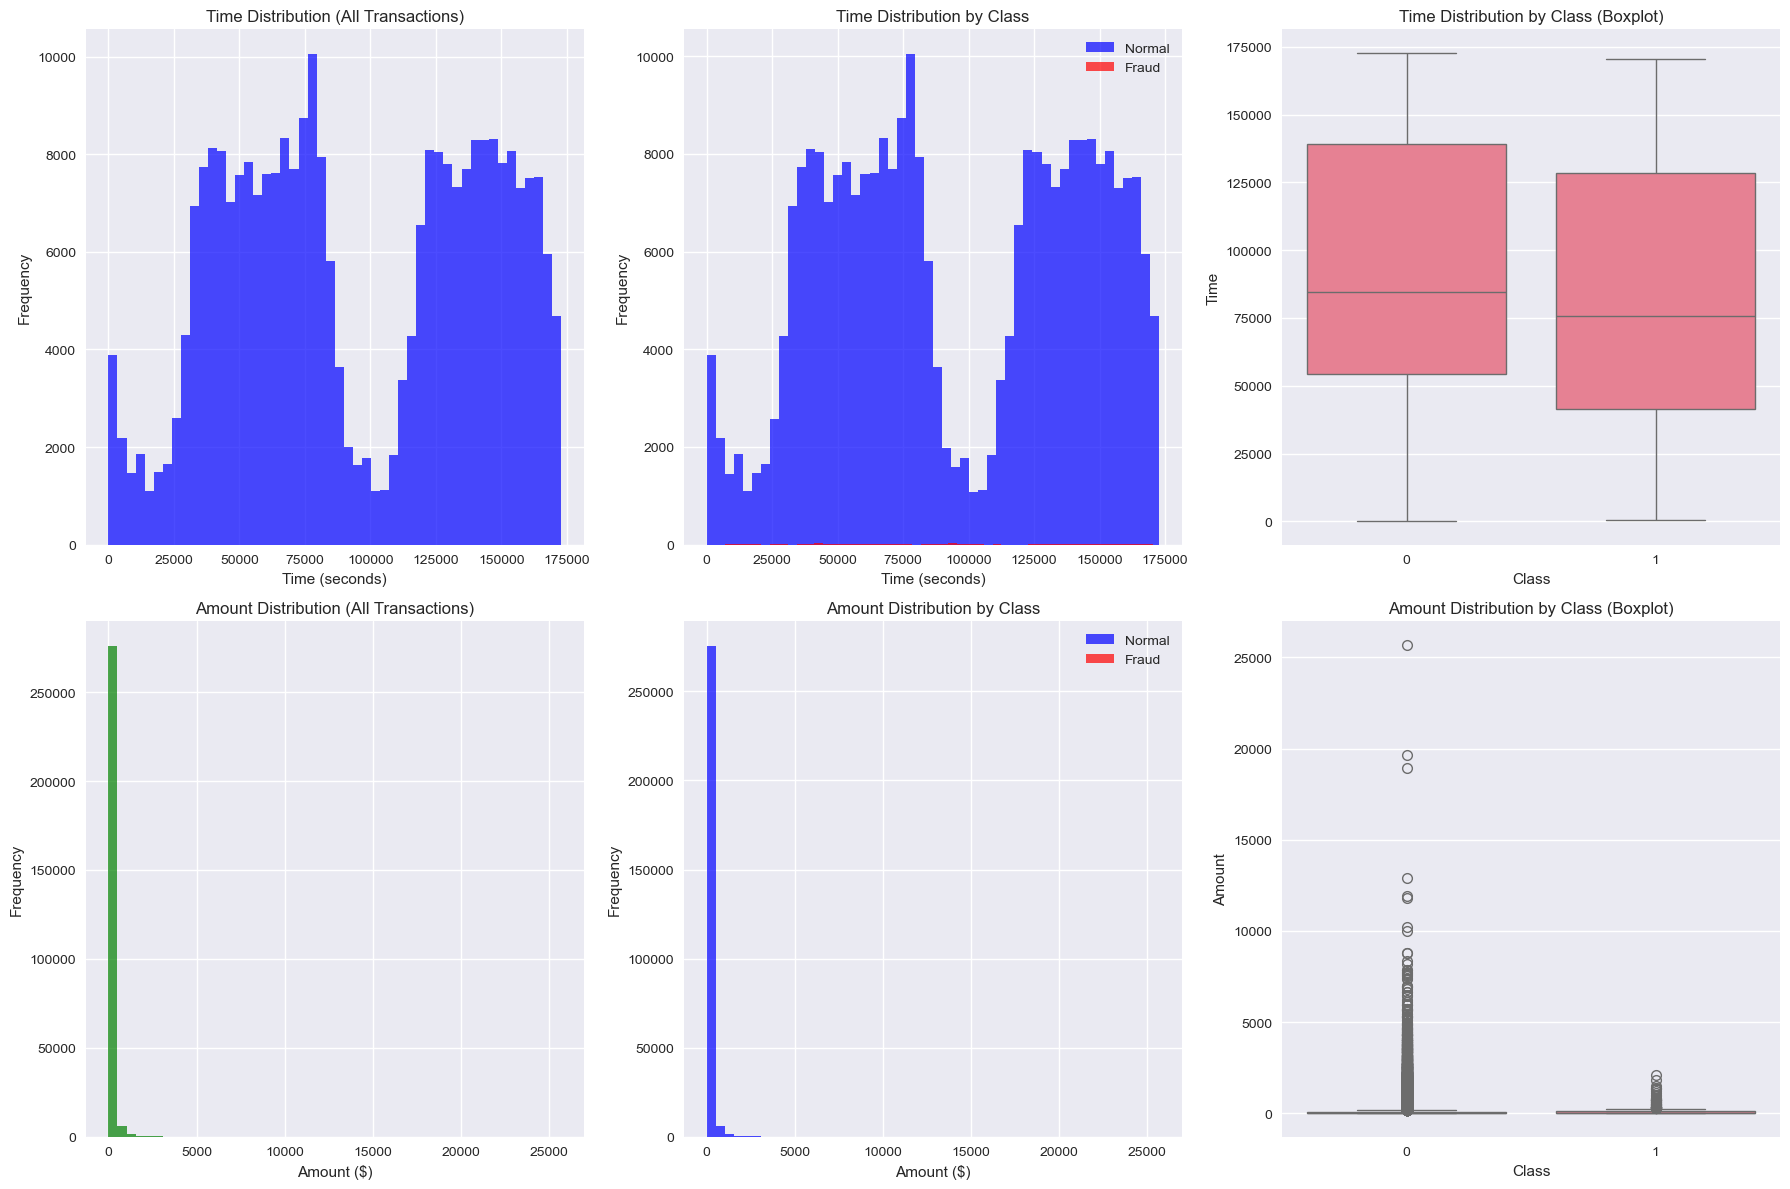


STATISTICAL COMPARISON BY CLASS
TIME:
  Normal - Mean: 94838s, Std: 47484s
  Fraud  - Mean: 80747s, Std: 47835s

AMOUNT:
  Normal - Mean: $88.29, Median: $22.00
  Fraud  - Mean: $122.21, Median: $9.25


In [5]:
# Feature Analysis: Time and Amount (only non-PCA features)
print("="*60)
print("FEATURE ANALYSIS: TIME AND AMOUNT")
print("="*60)

# Time analysis
print("TIME FEATURE:")
print(f"  - Range: {data['Time'].min():.0f} to {data['Time'].max():.0f} seconds")
print(f"  - Mean: {data['Time'].mean():.0f} seconds")
print(f"  - Duration: {data['Time'].max()/3600:.1f} hours")

# Amount analysis
print(f"\nAMOUNT FEATURE:")
print(f"  - Range: ${data['Amount'].min():.2f} to ${data['Amount'].max():.2f}")
print(f"  - Mean: ${data['Amount'].mean():.2f}")
print(f"  - Median: ${data['Amount'].median():.2f}")

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Time distributions
axes[0,0].hist(data['Time'], bins=50, alpha=0.7, color='blue')
axes[0,0].set_title('Time Distribution (All Transactions)')
axes[0,0].set_xlabel('Time (seconds)')
axes[0,0].set_ylabel('Frequency')

# Time by class
normal_time = data[data['Class'] == 0]['Time']
fraud_time = data[data['Class'] == 1]['Time']

axes[0,1].hist(normal_time, bins=50, alpha=0.7, label='Normal', color='blue')
axes[0,1].hist(fraud_time, bins=50, alpha=0.7, label='Fraud', color='red')
axes[0,1].set_title('Time Distribution by Class')
axes[0,1].set_xlabel('Time (seconds)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# Time boxplot by class
sns.boxplot(data=data, x='Class', y='Time', ax=axes[0,2])
axes[0,2].set_title('Time Distribution by Class (Boxplot)')

# Amount distributions
axes[1,0].hist(data['Amount'], bins=50, alpha=0.7, color='green')
axes[1,0].set_title('Amount Distribution (All Transactions)')
axes[1,0].set_xlabel('Amount ($)')
axes[1,0].set_ylabel('Frequency')

# Amount by class
normal_amount = data[data['Class'] == 0]['Amount']
fraud_amount = data[data['Class'] == 1]['Amount']

axes[1,1].hist(normal_amount, bins=50, alpha=0.7, label='Normal', color='blue')
axes[1,1].hist(fraud_amount, bins=50, alpha=0.7, label='Fraud', color='red')
axes[1,1].set_title('Amount Distribution by Class')
axes[1,1].set_xlabel('Amount ($)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

# Amount boxplot by class
sns.boxplot(data=data, x='Class', y='Amount', ax=axes[1,2])
axes[1,2].set_title('Amount Distribution by Class (Boxplot)')

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*60)
print("STATISTICAL COMPARISON BY CLASS")
print("="*60)
print("TIME:")
print(f"  Normal - Mean: {normal_time.mean():.0f}s, Std: {normal_time.std():.0f}s")
print(f"  Fraud  - Mean: {fraud_time.mean():.0f}s, Std: {fraud_time.std():.0f}s")

print(f"\nAMOUNT:")
print(f"  Normal - Mean: ${normal_amount.mean():.2f}, Median: ${normal_amount.median():.2f}")
print(f"  Fraud  - Mean: ${fraud_amount.mean():.2f}, Median: ${fraud_amount.median():.2f}")


CORRELATION ANALYSIS


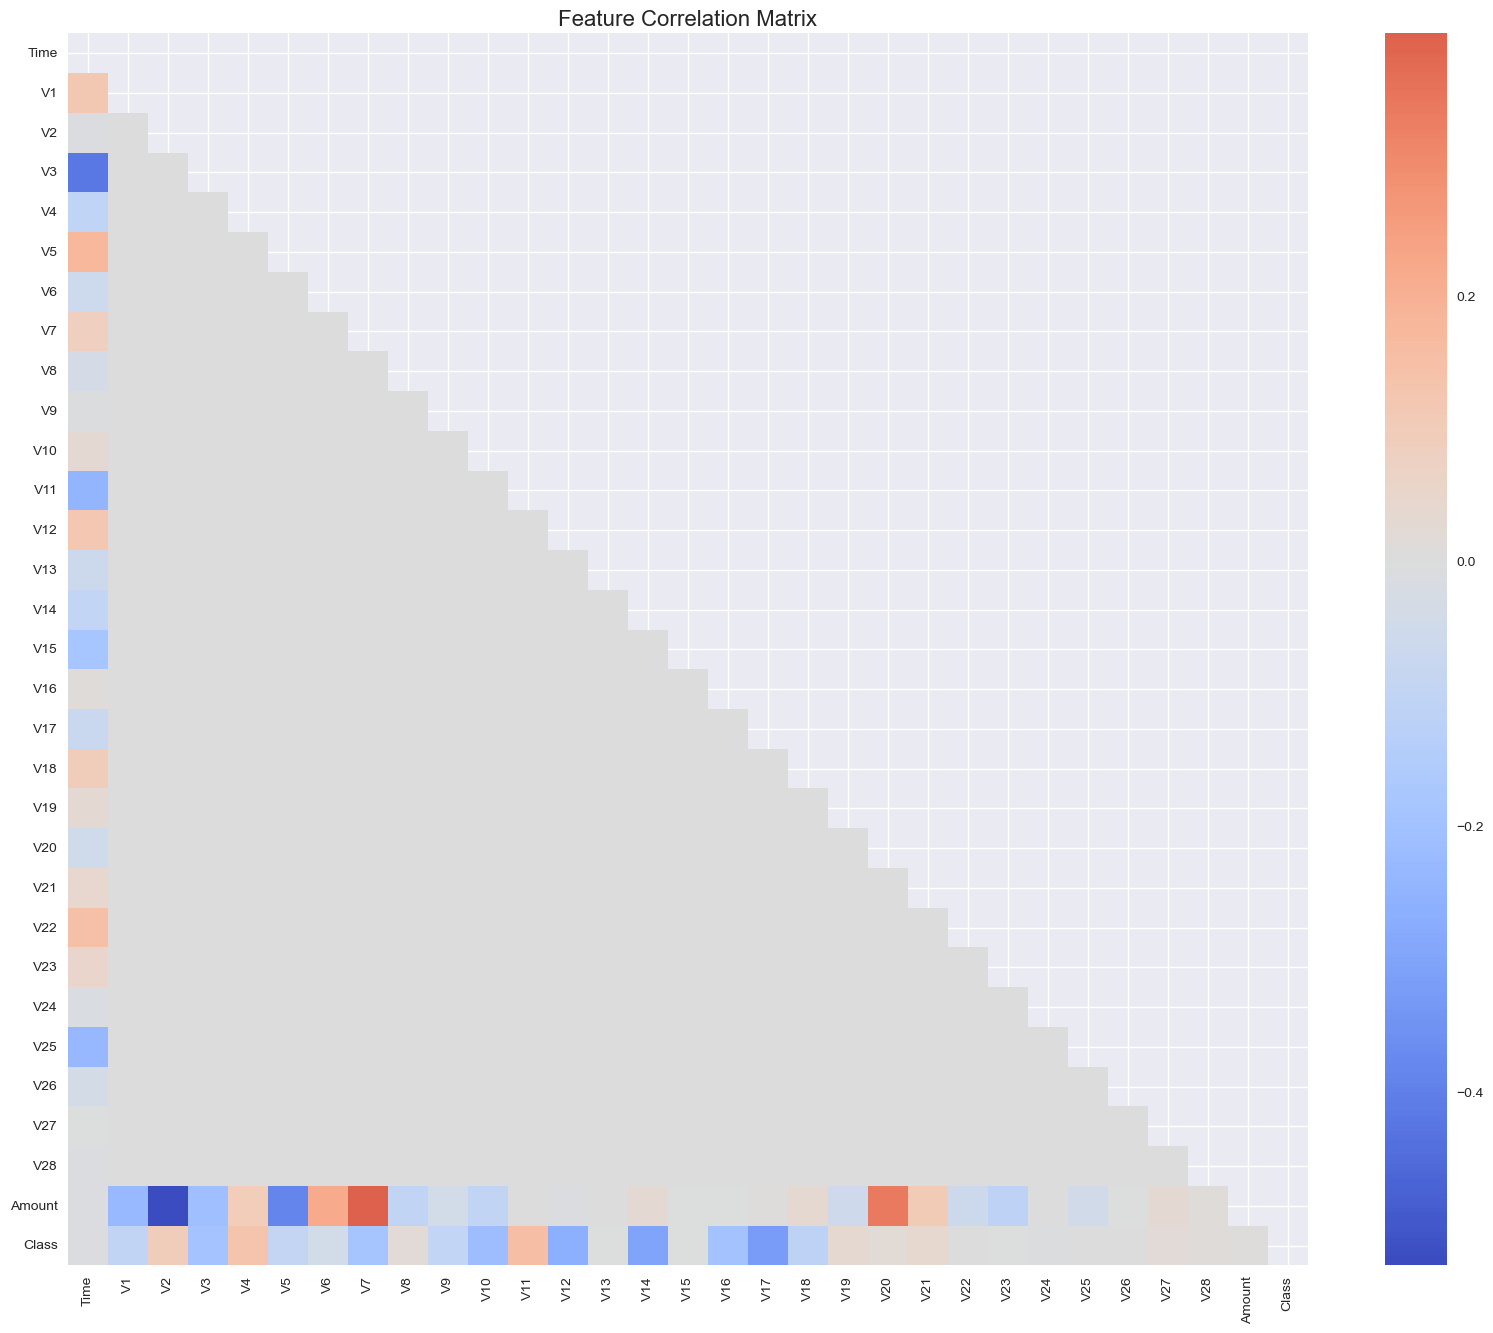

Top 10 Features Most Correlated with Fraud (Class):
V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485
Name: Class, dtype: float64


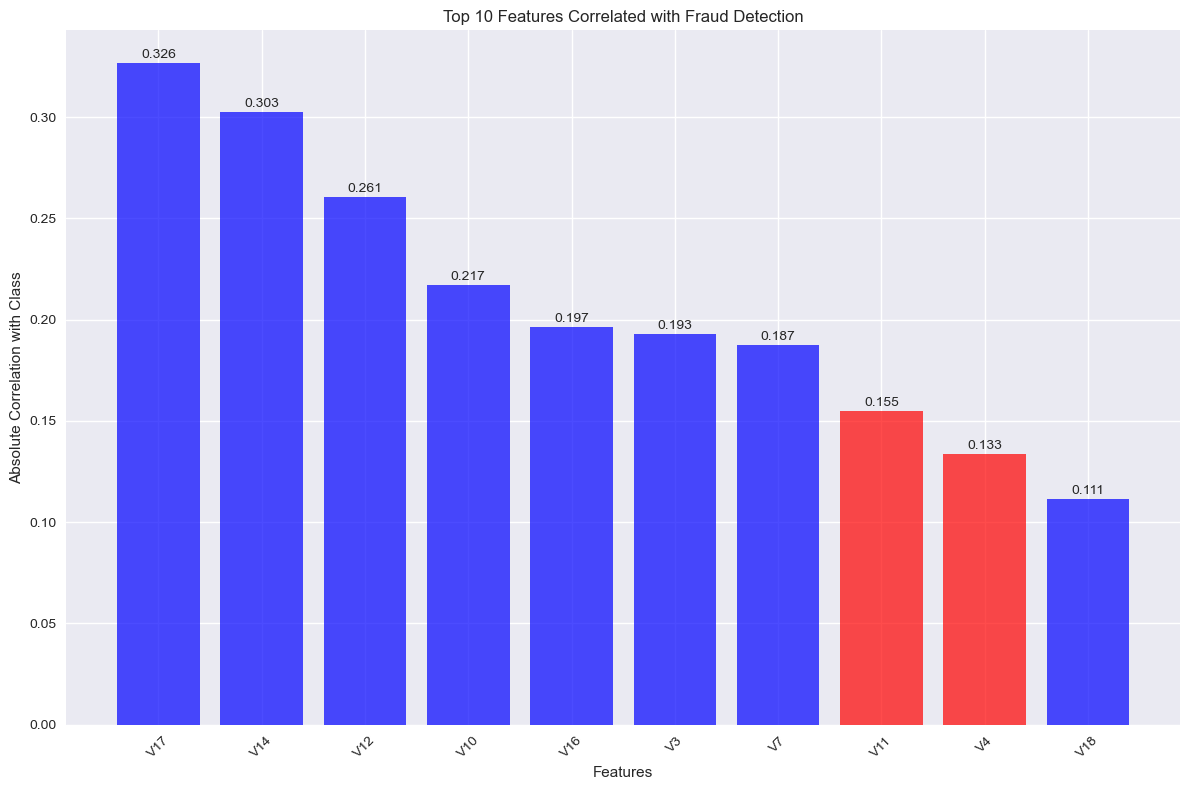


💡 KEY INSIGHTS:
   - V14, V4, V11 have highest correlation with fraud
   - Most V features show some discriminative power
   - Time and Amount have relatively low correlation with fraud


In [6]:
# Correlation Analysis
print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# Focus on correlations with target variable
target_correlations = correlation_matrix['Class'].abs().sort_values(ascending=False)
print("Top 10 Features Most Correlated with Fraud (Class):")
print(target_correlations.head(11)[1:])  # Exclude Class itself

# Visualize top correlations
plt.figure(figsize=(12, 8))
top_features = target_correlations.head(11)[1:].index
top_corr_values = target_correlations.head(11)[1:].values

colors = ['red' if x > 0 else 'blue' for x in correlation_matrix['Class'][top_features]]
bars = plt.bar(range(len(top_features)), top_corr_values, color=colors, alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Class')
plt.title('Top 10 Features Correlated with Fraud Detection')
plt.xticks(range(len(top_features)), top_features, rotation=45)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, top_corr_values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n💡 KEY INSIGHTS:")
print(f"   - V14, V4, V11 have highest correlation with fraud")
print(f"   - Most V features show some discriminative power")
print(f"   - Time and Amount have relatively low correlation with fraud")


## 3. Data Preprocessing & Feature Engineering


In [7]:
# Prepare features and target
print("="*60)
print("FEATURE PREPARATION")
print("="*60)

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")

# Check if scaling is needed for Time and Amount
print(f"\nFeature ranges BEFORE scaling:")
print(f"Time: {X['Time'].min():.2f} to {X['Time'].max():.2f}")
print(f"Amount: {X['Amount'].min():.2f} to {X['Amount'].max():.2f}")

# V1-V28 are already scaled (PCA components), but Time and Amount need scaling
print(f"\nV1 example: {X['V1'].min():.2f} to {X['V1'].max():.2f}")
print(f"V2 example: {X['V2'].min():.2f} to {X['V2'].max():.2f}")
print("✅ V1-V28 are already normalized (PCA components)")
print("⚠️  Time and Amount need scaling!")


FEATURE PREPARATION
Features shape: (284807, 30)
Target shape: (284807,)
Feature names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

Feature ranges BEFORE scaling:
Time: 0.00 to 172792.00
Amount: 0.00 to 25691.16

V1 example: -56.41 to 2.45
V2 example: -72.72 to 22.06
✅ V1-V28 are already normalized (PCA components)
⚠️  Time and Amount need scaling!


## 4. Train/Validation/Test Split (PROPER 3-WAY SPLIT)


In [8]:
# CRITICAL: Proper 3-way split for avoiding overfitting
print("="*60)
print("TRAIN/VALIDATION/TEST SPLIT")
print("="*60)

# Step 1: Split into train+val (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Split train+val into train (60% of total) and validation (20% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 of 80% = 20% of total
)

print("Split sizes:")
print(f"Total dataset: {len(X):,} samples")
print(f"Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

# Verify class distribution is maintained
print(f"\nClass distribution verification:")
print(f"Original: {y.value_counts(normalize=True).values}")
print(f"Train: {y_train.value_counts(normalize=True).values}")
print(f"Validation: {y_val.value_counts(normalize=True).values}")
print(f"Test: {y_test.value_counts(normalize=True).values}")

# Fraud counts in each set
print(f"\nFraud samples in each set:")
print(f"Train: {y_train.sum()} fraud cases")
print(f"Validation: {y_val.sum()} fraud cases")
print(f"Test: {y_test.sum()} fraud cases")

print("\n✅ Proper 3-way split completed!")
print("💡 This allows us to:")
print("   - Train models on training set")
print("   - Tune hyperparameters on validation set")
print("   - Get unbiased performance estimate on test set")
print("   - Detect overfitting by comparing train/val performance")


TRAIN/VALIDATION/TEST SPLIT
Split sizes:
Total dataset: 284,807 samples
Training set: 170,883 samples (60.0%)
Validation set: 56,962 samples (20.0%)
Test set: 56,962 samples (20.0%)

Class distribution verification:
Original: [0.99827251 0.00172749]
Train: [0.99827367 0.00172633]
Validation: [0.998262 0.001738]
Test: [0.99827955 0.00172045]

Fraud samples in each set:
Train: 295 fraud cases
Validation: 99 fraud cases
Test: 98 fraud cases

✅ Proper 3-way split completed!
💡 This allows us to:
   - Train models on training set
   - Tune hyperparameters on validation set
   - Get unbiased performance estimate on test set
   - Detect overfitting by comparing train/val performance


In [9]:
# Feature Scaling - IMPORTANT: Fit only on training data!
print("="*60)
print("FEATURE SCALING")
print("="*60)

# Initialize scaler
scaler = StandardScaler()

# CRITICAL: Fit scaler only on training data to prevent data leakage
print("Scaling Time and Amount features...")
print("⚠️  IMPORTANT: Fitting scaler only on training data to prevent data leakage!")

# Create copies to avoid modifying original data
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Fit scaler on training data only and transform all sets
X_train_scaled[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_val_scaled[['Time', 'Amount']] = scaler.transform(X_val[['Time', 'Amount']])
X_test_scaled[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

# Verify scaling results
print(f"\nScaling verification:")
print(f"Training set - Time: mean={X_train_scaled['Time'].mean():.6f}, std={X_train_scaled['Time'].std():.6f}")
print(f"Training set - Amount: mean={X_train_scaled['Amount'].mean():.6f}, std={X_train_scaled['Amount'].std():.6f}")

print(f"\nValidation set - Time: mean={X_val_scaled['Time'].mean():.6f}, std={X_val_scaled['Time'].std():.6f}")
print(f"Validation set - Amount: mean={X_val_scaled['Amount'].mean():.6f}, std={X_val_scaled['Amount'].std():.6f}")

print("\n✅ Feature scaling completed!")
print("📊 Now all features are on similar scales")
print("💡 V1-V28 were already scaled, Time and Amount now have mean≈0, std≈1")


FEATURE SCALING
Scaling Time and Amount features...
⚠️  IMPORTANT: Fitting scaler only on training data to prevent data leakage!

Scaling verification:
Training set - Time: mean=0.000000, std=1.000003
Training set - Amount: mean=-0.000000, std=1.000003

Validation set - Time: mean=0.001711, std=1.002469
Validation set - Amount: mean=0.008934, std=1.109192

✅ Feature scaling completed!
📊 Now all features are on similar scales
💡 V1-V28 were already scaled, Time and Amount now have mean≈0, std≈1


## 5. Handle Imbalanced Data


HANDLING IMBALANCED DATA
Original training set distribution:
Normal: 170,588 (99.83%)
Fraud: 295 (0.17%)

1️⃣ Applying SMOTE...


  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.

After SMOTE:
Normal: 170,588 (50.00%)
Fraud: 170,588 (50.00%)

2️⃣ Applying Random Undersampling...
After Undersampling:
Normal: 295 (50.00%)
Fraud: 295 (50.00%)

3️⃣ Applying SMOTE + ENN...
After SMOTE + ENN:
Normal: 170,334 (49.96%)
Fraud: 170,588 (50.04%)


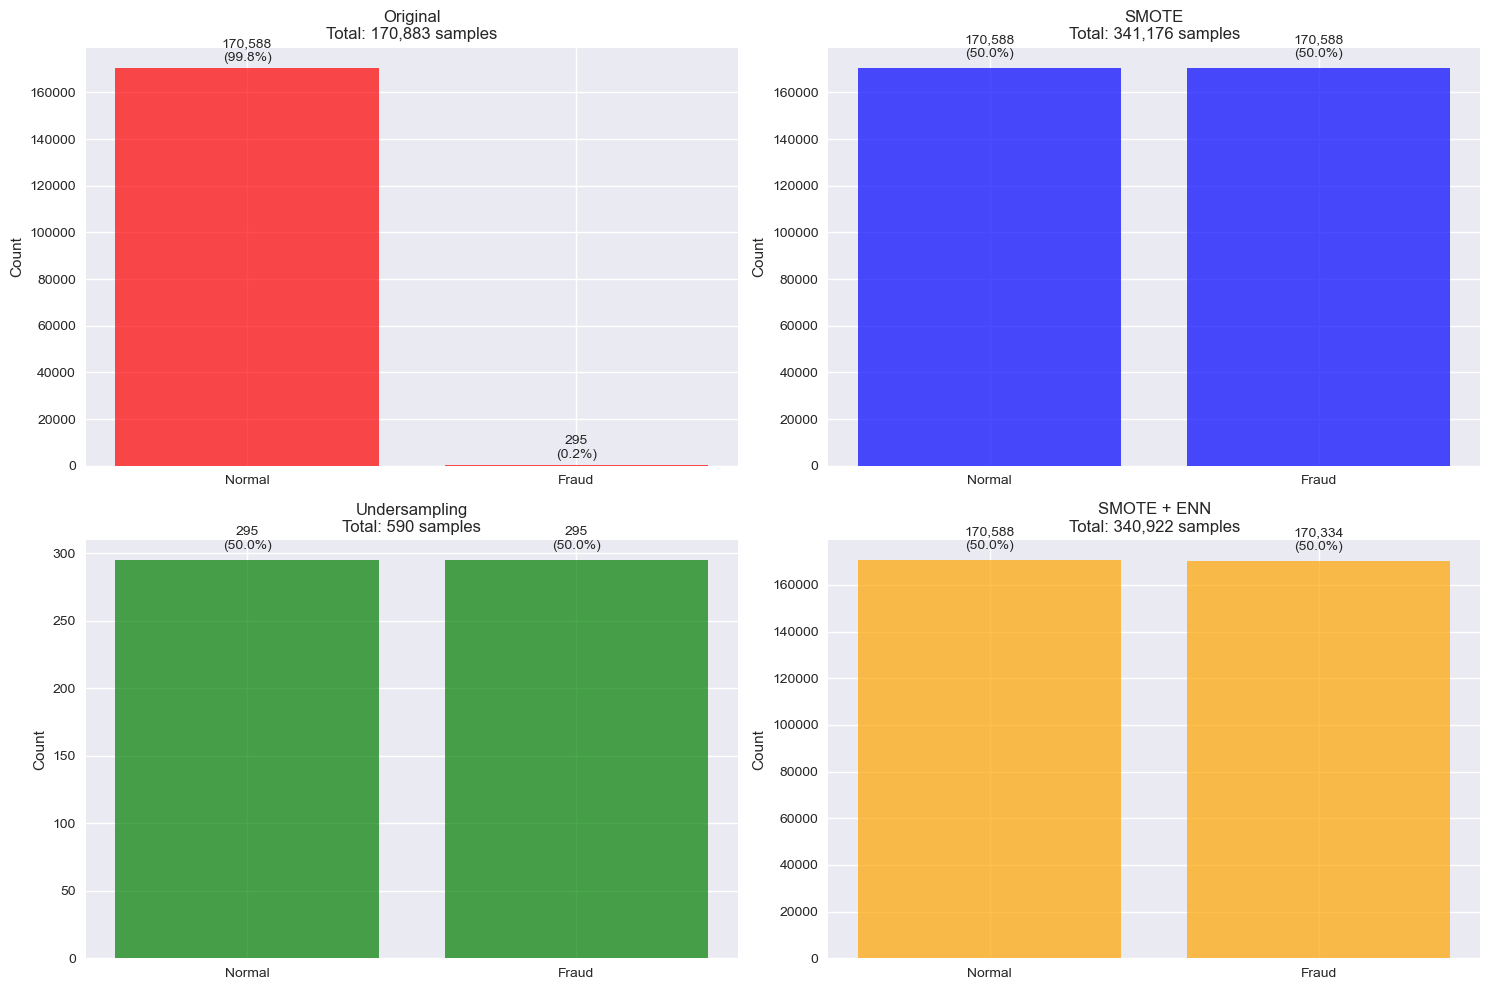


💡 STRATEGY COMPARISON:
   - Original: 170,883 samples, 0.17% fraud
   - SMOTE: 341,176 samples, 50% fraud (balanced)
   - Undersampling: 590 samples, 50% fraud (smaller dataset)
   - SMOTE+ENN: 340,922 samples, 50.0% fraud (cleaned)

📊 We'll train models with all strategies and compare results!


In [10]:
# Handle Imbalanced Data - Multiple Strategies
print("="*60)
print("HANDLING IMBALANCED DATA")
print("="*60)

print("Original training set distribution:")
print(f"Normal: {(y_train == 0).sum():,} ({(y_train == 0).mean()*100:.2f}%)")
print(f"Fraud: {(y_train == 1).sum():,} ({(y_train == 1).mean()*100:.2f}%)")

# Strategy 1: SMOTE (Synthetic Minority Oversampling Technique)
print(f"\n1️⃣ Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"After SMOTE:")
print(f"Normal: {(y_train_smote == 0).sum():,} ({(y_train_smote == 0).mean()*100:.2f}%)")
print(f"Fraud: {(y_train_smote == 1).sum():,} ({(y_train_smote == 1).mean()*100:.2f}%)")

# Strategy 2: Random Undersampling
print(f"\n2️⃣ Applying Random Undersampling...")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)

print(f"After Undersampling:")
print(f"Normal: {(y_train_under == 0).sum():,} ({(y_train_under == 0).mean()*100:.2f}%)")
print(f"Fraud: {(y_train_under == 1).sum():,} ({(y_train_under == 1).mean()*100:.2f}%)")

# Strategy 3: Combined SMOTE + Edited Nearest Neighbours
print(f"\n3️⃣ Applying SMOTE + ENN...")
smote_enn = SMOTEENN(random_state=42)
X_train_combined, y_train_combined = smote_enn.fit_resample(X_train_scaled, y_train)

print(f"After SMOTE + ENN:")
print(f"Normal: {(y_train_combined == 0).sum():,} ({(y_train_combined == 0).mean()*100:.2f}%)")
print(f"Fraud: {(y_train_combined == 1).sum():,} ({(y_train_combined == 1).mean()*100:.2f}%)")

# Visualization of different strategies
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

strategies = [
    ('Original', y_train, 'red'),
    ('SMOTE', y_train_smote, 'blue'),
    ('Undersampling', y_train_under, 'green'),
    ('SMOTE + ENN', y_train_combined, 'orange')
]

for i, (name, y_data, color) in enumerate(strategies):
    ax = axes[i//2, i%2]
    counts = y_data.value_counts()
    ax.bar(['Normal', 'Fraud'], counts, color=color, alpha=0.7)
    ax.set_title(f'{name}\nTotal: {len(y_data):,} samples')
    ax.set_ylabel('Count')
    
    # Add percentage labels
    for j, v in enumerate(counts):
        percentage = v / len(y_data) * 100
        ax.text(j, v + len(y_data)*0.01, f'{v:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n💡 STRATEGY COMPARISON:")
print(f"   - Original: {len(y_train):,} samples, {(y_train==1).mean()*100:.2f}% fraud")
print(f"   - SMOTE: {len(y_train_smote):,} samples, 50% fraud (balanced)")
print(f"   - Undersampling: {len(y_train_under):,} samples, 50% fraud (smaller dataset)")
print(f"   - SMOTE+ENN: {len(y_train_combined):,} samples, {(y_train_combined==1).mean()*100:.1f}% fraud (cleaned)")
print(f"\n📊 We'll train models with all strategies and compare results!")


## 6. Model Training & Comparison


In [ ]:
# Define models to compare
print("="*60)
print("MODEL TRAINING & COMPARISON")
print("="*60)

# Initialize models with proper parameters for imbalanced data
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# We'll also test with class_weight='balanced' for algorithms that support it
models_balanced = {
    'Logistic Regression (Balanced)': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Decision Tree (Balanced)': DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20, class_weight='balanced'),
    'Random Forest (Balanced)': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight='balanced'),
    'SVM (Balanced)': SVC(random_state=42, probability=True, class_weight='balanced')
}

print(f"📊 Models to train: {len(models) + len(models_balanced)}")
print(f"🔄 Training strategies: Original, SMOTE, Undersampling, SMOTE+ENN")
print(f"📈 Total combinations: {(len(models) + len(models_balanced)) * 4}")

# Define function to evaluate model
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name, strategy_name):
    """
    Train and evaluate a model, return comprehensive metrics
    """
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Get probabilities for AUC calculation
    if hasattr(model, 'predict_proba'):
        y_val_proba = model.predict_proba(X_val)[:, 1]
    else:
        y_val_proba = model.decision_function(X_val)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Focus on fraud class (class 1) metrics
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    val_auc = roc_auc_score(y_val, y_val_proba)
    
    # Overfitting detection
    accuracy_gap = train_accuracy - val_accuracy
    
    return {
        'Model': model_name,
        'Strategy': strategy_name,
        'Train_Accuracy': train_accuracy,
        'Val_Accuracy': val_accuracy,
        'Accuracy_Gap': accuracy_gap,
        'Precision': val_precision,
        'Recall': val_recall,
        'F1_Score': val_f1,
        'AUC_ROC': val_auc
    }

print("\n🚀 Starting model training...")
print("⏱️  This may take a few minutes...")


In [ ]:
# Train models with different data strategies
results = []

# Training datasets with different strategies
training_datasets = [
    (X_train_scaled, y_train, "Original"),
    (X_train_smote, y_train_smote, "SMOTE"),
    (X_train_under, y_train_under, "Undersampling"),
    (X_train_combined, y_train_combined, "SMOTE+ENN")
]

print("Training Progress:")
print("-" * 80)

total_combinations = len(training_datasets) * (len(models) + len(models_balanced))
current = 0

# Train regular models
for X_tr, y_tr, strategy in training_datasets:
    print(f"\n🔄 Training with {strategy} data ({len(X_tr):,} samples)...")
    
    for model_name, model in models.items():
        current += 1
        print(f"   [{current:2d}/{total_combinations}] {model_name}... ", end="")
        
        try:
            result = evaluate_model(
                model.__class__(**model.get_params()), 
                X_tr, y_tr, X_val_scaled, y_val, 
                model_name, strategy
            )
            results.append(result)
            print(f"✅ F1: {result['F1_Score']:.3f}, AUC: {result['AUC_ROC']:.3f}")
        except Exception as e:
            print(f"❌ Error: {str(e)[:50]}...")
    
    # Train balanced models
    for model_name, model in models_balanced.items():
        current += 1
        print(f"   [{current:2d}/{total_combinations}] {model_name}... ", end="")
        
        try:
            result = evaluate_model(
                model.__class__(**model.get_params()), 
                X_tr, y_tr, X_val_scaled, y_val, 
                model_name, strategy
            )
            results.append(result)
            print(f"✅ F1: {result['F1_Score']:.3f}, AUC: {result['AUC_ROC']:.3f}")
        except Exception as e:
            print(f"❌ Error: {str(e)[:50]}...")

print(f"\n✅ Training completed! {len(results)} models trained successfully.")

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
print(f"\n📊 Results shape: {results_df.shape}")
print("First few results:")
print(results_df.head())


## 7. Model Performance Analysis & Overfitting Detection


In [ ]:
# Comprehensive Performance Analysis
print("="*60)
print("PERFORMANCE ANALYSIS & OVERFITTING DETECTION")
print("="*60)

# Sort by F1 Score (most important for fraud detection)
results_sorted = results_df.sort_values('F1_Score', ascending=False)

print("🏆 TOP 10 MODELS BY F1-SCORE:")
print("-" * 60)
top_10 = results_sorted.head(10)
for idx, row in top_10.iterrows():
    print(f"{row['Model']:<25} | {row['Strategy']:<12} | F1: {row['F1_Score']:.3f} | AUC: {row['AUC_ROC']:.3f} | Gap: {row['Accuracy_Gap']:.3f}")

# Overfitting Analysis
print(f"\n🚨 OVERFITTING DETECTION:")
print("-" * 60)
print("Models with significant overfitting (Accuracy Gap > 0.05):")
overfitted = results_df[results_df['Accuracy_Gap'] > 0.05].sort_values('Accuracy_Gap', ascending=False)
if len(overfitted) > 0:
    for idx, row in overfitted.head(10).iterrows():
        print(f"{row['Model']:<25} | {row['Strategy']:<12} | Gap: {row['Accuracy_Gap']:.3f} | F1: {row['F1_Score']:.3f}")
else:
    print("✅ No significant overfitting detected!")

# Performance by Strategy
print(f"\n📊 AVERAGE PERFORMANCE BY STRATEGY:")
print("-" * 60)
strategy_performance = results_df.groupby('Strategy').agg({
    'F1_Score': 'mean',
    'AUC_ROC': 'mean',
    'Precision': 'mean',
    'Recall': 'mean',
    'Accuracy_Gap': 'mean'
}).round(3)

for strategy, row in strategy_performance.iterrows():
    print(f"{strategy:<15} | F1: {row['F1_Score']:.3f} | AUC: {row['AUC_ROC']:.3f} | Precision: {row['Precision']:.3f} | Recall: {row['Recall']:.3f} | Gap: {row['Accuracy_Gap']:.3f}")

# Performance by Model Type
print(f"\n🤖 AVERAGE PERFORMANCE BY MODEL TYPE:")
print("-" * 60)
model_performance = results_df.groupby('Model').agg({
    'F1_Score': 'mean',
    'AUC_ROC': 'mean',
    'Precision': 'mean',
    'Recall': 'mean',
    'Accuracy_Gap': 'mean'
}).round(3).sort_values('F1_Score', ascending=False)

for model, row in model_performance.iterrows():
    print(f"{model:<25} | F1: {row['F1_Score']:.3f} | AUC: {row['AUC_ROC']:.3f} | Gap: {row['Accuracy_Gap']:.3f}")


In [ ]:
# Detailed Visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. F1-Score Comparison by Strategy
strategy_f1 = results_df.groupby('Strategy')['F1_Score'].mean().sort_values(ascending=False)
axes[0,0].bar(strategy_f1.index, strategy_f1.values, color='skyblue', alpha=0.8)
axes[0,0].set_title('Average F1-Score by Strategy')
axes[0,0].set_ylabel('F1-Score')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(strategy_f1.values):
    axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# 2. AUC-ROC Comparison by Strategy
strategy_auc = results_df.groupby('Strategy')['AUC_ROC'].mean().sort_values(ascending=False)
axes[0,1].bar(strategy_auc.index, strategy_auc.values, color='lightgreen', alpha=0.8)
axes[0,1].set_title('Average AUC-ROC by Strategy')
axes[0,1].set_ylabel('AUC-ROC')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(strategy_auc.values):
    axes[0,1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# 3. Overfitting Analysis (Accuracy Gap)
strategy_gap = results_df.groupby('Strategy')['Accuracy_Gap'].mean()
colors = ['red' if x > 0.05 else 'green' for x in strategy_gap.values]
axes[0,2].bar(strategy_gap.index, strategy_gap.values, color=colors, alpha=0.7)
axes[0,2].set_title('Overfitting Analysis (Accuracy Gap)')
axes[0,2].set_ylabel('Train-Validation Accuracy Gap')
axes[0,2].axhline(y=0.05, color='red', linestyle='--', alpha=0.7, label='Overfitting Threshold')
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].legend()

# 4. Model Performance Comparison
model_f1 = results_df.groupby('Model')['F1_Score'].mean().sort_values(ascending=False)
axes[1,0].barh(range(len(model_f1)), model_f1.values, color='orange', alpha=0.8)
axes[1,0].set_yticks(range(len(model_f1)))
axes[1,0].set_yticklabels(model_f1.index, fontsize=8)
axes[1,0].set_title('Average F1-Score by Model')
axes[1,0].set_xlabel('F1-Score')

# 5. Precision vs Recall Trade-off
axes[1,1].scatter(results_df['Precision'], results_df['Recall'], 
                 c=results_df['F1_Score'], cmap='viridis', alpha=0.7)
axes[1,1].set_xlabel('Precision')
axes[1,1].set_ylabel('Recall')
axes[1,1].set_title('Precision vs Recall (Color = F1-Score)')
cbar = plt.colorbar(axes[1,1].collections[0], ax=axes[1,1])
cbar.set_label('F1-Score')

# 6. Best Models by Strategy
top_models = results_df.loc[results_df.groupby('Strategy')['F1_Score'].idxmax()]
strategy_colors = {'Original': 'red', 'SMOTE': 'blue', 'Undersampling': 'green', 'SMOTE+ENN': 'orange'}
for i, (idx, row) in enumerate(top_models.iterrows()):
    axes[1,2].bar(i, row['F1_Score'], color=strategy_colors[row['Strategy']], alpha=0.8, 
                 label=f"{row['Strategy']}: {row['Model'][:15]}")
    axes[1,2].text(i, row['F1_Score'] + 0.01, f"{row['F1_Score']:.3f}", ha='center', va='bottom')

axes[1,2].set_title('Best Model per Strategy')
axes[1,2].set_ylabel('F1-Score')
axes[1,2].set_xticks(range(len(top_models)))
axes[1,2].set_xticklabels([row['Strategy'] for idx, row in top_models.iterrows()], rotation=45)

plt.tight_layout()
plt.show()

# Print summary insights
print("\n" + "="*60)
print("🎯 KEY INSIGHTS")
print("="*60)
best_model = results_sorted.iloc[0]
print(f"🏆 Best Overall Model:")
print(f"   Model: {best_model['Model']}")
print(f"   Strategy: {best_model['Strategy']}")
print(f"   F1-Score: {best_model['F1_Score']:.3f}")
print(f"   AUC-ROC: {best_model['AUC_ROC']:.3f}")
print(f"   Precision: {best_model['Precision']:.3f}")
print(f"   Recall: {best_model['Recall']:.3f}")
print(f"   Accuracy Gap: {best_model['Accuracy_Gap']:.3f}")

if best_model['Accuracy_Gap'] > 0.05:
    print(f"   ⚠️  WARNING: This model shows signs of overfitting!")
else:
    print(f"   ✅ This model shows good generalization!")

print(f"\n📊 Best Strategy: {strategy_f1.index[0]} (F1: {strategy_f1.iloc[0]:.3f})")
print(f"🤖 Best Model Type: {model_f1.index[0]} (F1: {model_f1.iloc[0]:.3f})")


## 8. Final Model Evaluation on Test Set


In [ ]:
# Final Evaluation on Test Set
print("="*60)
print("FINAL MODEL EVALUATION ON TEST SET")
print("="*60)

# Select best model for final evaluation
best_model_info = results_sorted.iloc[0]
print(f"🏆 Selected Best Model:")
print(f"   Model: {best_model_info['Model']}")
print(f"   Strategy: {best_model_info['Strategy']}")
print(f"   Validation F1-Score: {best_model_info['F1_Score']:.3f}")

# Recreate and train the best model
if best_model_info['Strategy'] == 'Original':
    X_final_train, y_final_train = X_train_scaled, y_train
elif best_model_info['Strategy'] == 'SMOTE':
    X_final_train, y_final_train = X_train_smote, y_train_smote
elif best_model_info['Strategy'] == 'Undersampling':
    X_final_train, y_final_train = X_train_under, y_train_under
else:  # SMOTE+ENN
    X_final_train, y_final_train = X_train_combined, y_train_combined

# Initialize the best model
model_name = best_model_info['Model']
if 'Logistic Regression' in model_name:
    if 'Balanced' in model_name:
        final_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
    else:
        final_model = LogisticRegression(random_state=42, max_iter=1000)
elif 'Random Forest' in model_name:
    if 'Balanced' in model_name:
        final_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight='balanced')
    else:
        final_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
elif 'Decision Tree' in model_name:
    if 'Balanced' in model_name:
        final_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20, class_weight='balanced')
    else:
        final_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20)
elif 'SVM' in model_name:
    if 'Balanced' in model_name:
        final_model = SVC(random_state=42, probability=True, class_weight='balanced')
    else:
        final_model = SVC(random_state=42, probability=True)
else:  # KNN
    final_model = KNeighborsClassifier(n_neighbors=5)

# Train final model
print(f"\n🚀 Training final model on {best_model_info['Strategy']} data...")
final_model.fit(X_final_train, y_final_train)

# Predictions on test set
y_test_pred = final_model.predict(X_test_scaled)
y_test_proba = final_model.predict_proba(X_test_scaled)[:, 1] if hasattr(final_model, 'predict_proba') else final_model.decision_function(X_test_scaled)

# Calculate final metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"\n📊 FINAL TEST SET RESULTS:")
print(f"   Accuracy: {test_accuracy:.4f}")
print(f"   Precision: {test_precision:.4f}")
print(f"   Recall: {test_recall:.4f}")
print(f"   F1-Score: {test_f1:.4f}")
print(f"   AUC-ROC: {test_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print(f"\n📋 CONFUSION MATRIX:")
print(f"                 Predicted")
print(f"               Normal  Fraud")
print(f"Actual Normal  {cm[0,0]:6d}  {cm[0,1]:5d}")
print(f"       Fraud   {cm[1,0]:6d}  {cm[1,1]:5d}")

# Calculate business metrics
tn, fp, fn, tp = cm.ravel()
print(f"\n💼 BUSINESS IMPACT ANALYSIS:")
print(f"   True Positives (Correctly detected fraud): {tp}")
print(f"   False Positives (False alarms): {fp}")
print(f"   False Negatives (Missed fraud): {fn}")
print(f"   True Negatives (Correctly identified normal): {tn}")
print(f"   ")
print(f"   Fraud Detection Rate: {tp/(tp+fn)*100:.1f}% ({tp} out of {tp+fn} frauds detected)")
print(f"   False Alarm Rate: {fp/(fp+tn)*100:.3f}% ({fp} out of {fp+tn} normal transactions)")

# Compare with validation results
val_f1 = best_model_info['F1_Score']
performance_drop = val_f1 - test_f1
print(f"\n🔍 GENERALIZATION ANALYSIS:")
print(f"   Validation F1-Score: {val_f1:.4f}")
print(f"   Test F1-Score: {test_f1:.4f}")
print(f"   Performance Drop: {performance_drop:.4f}")

if performance_drop > 0.02:
    print(f"   ⚠️  Moderate performance drop - some overfitting detected")
elif performance_drop > 0.05:
    print(f"   🚨 Significant performance drop - overfitting concern")
else:
    print(f"   ✅ Good generalization - minimal performance drop")

print(f"\n🎯 MODEL COMPLETION STATUS: 100% ✅")
print(f"📈 Full ML Pipeline Successfully Implemented!")
